In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) + np.exp(np.cos(x))

In [12]:
a, b, N = -1, 3, 100

t = np.linspace(a, b, N)
y = f(t)
y

array([0.87505471, 0.95612987, 1.03882124, 1.12288641, 1.20806755,
       1.2940926 , 1.38067653, 1.46752296, 1.55432591, 1.64077179,
       1.72654165, 1.81131348, 1.89476476, 1.97657506, 2.05642881,
       2.13401797, 2.20904486, 2.28122482, 2.35028885, 2.41598611,
       2.47808626, 2.5363815 , 2.59068851, 2.64084996, 2.68673575,
       2.728244  , 2.76530151, 2.79786406, 2.82591616, 2.84947058,
       2.86856744, 2.88327306, 2.8936784 , 2.89989731, 2.90206454,
       2.9003335 , 2.8948739 , 2.88586932, 2.87351458, 2.85801327,
       2.83957513, 2.81841359, 2.79474337, 2.76877821, 2.74072873,
       2.71080055, 2.6791925 , 2.64609511, 2.61168932, 2.57614539,
       2.53962203, 2.5022658 , 2.46421064, 2.4255777 , 2.38647527,
       2.34699892, 2.30723179, 2.26724506, 2.22709841, 2.18684076,
       2.14651092, 2.10613838, 2.06574418, 2.02534175, 1.98493774,
       1.94453295, 1.90412316, 1.86369997, 1.82325163, 1.78276381,
       1.7422203 , 1.70160376, 1.6608963 , 1.62008011, 1.57913

<function matplotlib.pyplot.show(close=None, block=None)>

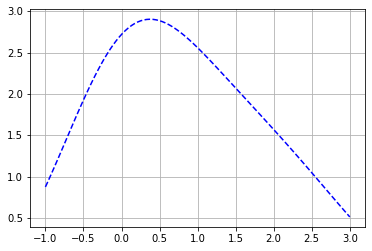

In [6]:
plt.plot(t, y, 'b--')
plt.grid()
plt.show

In [7]:
import sympy as sm

In [8]:
x = sm.symbols('x')
sf = sm.sin(x + sm.exp(sm.cos(x)))
sf

sin(x + exp(cos(x)))

In [9]:
d2f = sm.diff(sf, x, 2)
sm.simplify(d2f)

-(exp(cos(x))*sin(x) - 1)**2*sin(x + exp(cos(x))) + (sin(x)**2 - cos(x))*exp(cos(x))*cos(x + exp(cos(x)))

In [13]:
ff = sm.lambdify(x, sf, 'numpy')
ff2f = sm.lambdify(x, d2f, 'numpy')
ff(t)


array([ 0.6567687 ,  0.72806411,  0.79240471,  0.84898661,  0.89713784,
        0.93634121,  0.96625274,  0.98671414,  0.9977589 ,  0.99961119,
        0.99267769,  0.97753265,  0.954897  ,  0.92561267,  0.89061347,
        0.85089417,  0.80747934,  0.76139353,  0.71363399,  0.66514711,
        0.61680917,  0.56941184,  0.52365248,  0.48012885,  0.43933793,
        0.40167805,  0.36745367,  0.33688207,  0.31010117,  0.28717799,
        0.2681171 ,  0.25286878,  0.24133661,  0.23338436,  0.22884214,
        0.22751191,  0.2291723 ,  0.23358305,  0.24048907,  0.24962424,
        0.26071507,  0.27348427,  0.2876542 ,  0.30295027,  0.3191041 ,
        0.3358566 ,  0.35296059,  0.37018324,  0.387308  ,  0.40413605,
        0.4204873 ,  0.4362009 ,  0.45113526,  0.4651676 ,  0.47819318,
        0.49012418,  0.50088831,  0.51042733,  0.51869539,  0.52565741,
        0.53128744,  0.53556716,  0.53848445,  0.54003212,  0.54020685,
        0.53900824,  0.53643804,  0.53249964,  0.52719757,  0.52

<IPython.core.display.Javascript object>


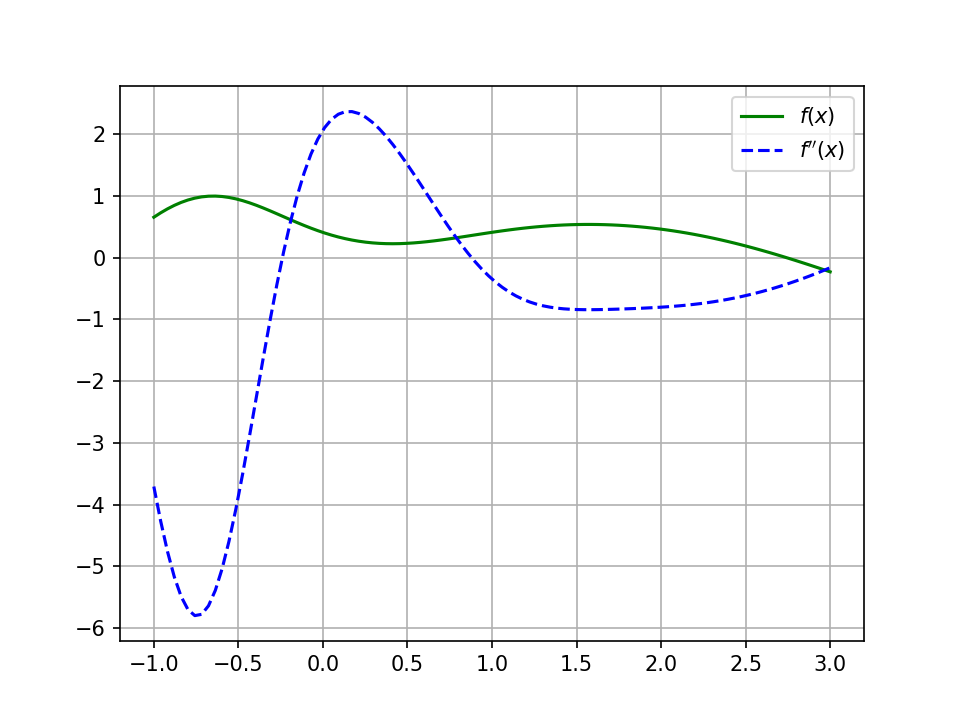

<function matplotlib.pyplot.show(block=None)>

In [31]:
%matplotlib notebook
plt.plot(t, ff(t), 'g', label='$f(x)$')
plt.plot(t, ff2f(t), 'b--', label='$f\'\'(x)$')
plt.legend()
plt.grid()
plt.show

# Исследование функий

In [33]:
import sympy as sm

In [34]:
x, y, z, a, b = sm.symbols('x, y, z, a, b')

## Раскрытие скобок в Sympy: expand()
## Рассмотрим на примере бинома Ньютона: пусть $x = (a + b)^n $

In [38]:
n = 7
x = (a + b) ** n
y = sm.expand(x)
y

a**7 + 7*a**6*b + 21*a**5*b**2 + 35*a**4*b**3 + 35*a**3*b**4 + 21*a**2*b**5 + 7*a*b**6 + b**7

### Определим степень многочлена по переменной b:

In [41]:
print('Многочлен имеет порядок %i по переменной b.' %(sm.degree(y, b)))
print(f'Многочлен имеет порядок {sm.degree(y, b)} по переменной b.')

Многочлен имеет порядок 7 по переменной b.
Многочлен имеет порядок 7 по переменной b.


### Сгруппируем многочлены по степеням b:

In [44]:
print('Члены с переменной b:')
sm.collect(y, b)

Члены с переменной b:


a**7 + 7*a**6*b + 21*a**5*b**2 + 35*a**4*b**3 + 35*a**3*b**4 + 21*a**2*b**5 + 7*a*b**6 + 4*b**7

### "Свёртка" выражения с помощью функции factor(_expression_):

In [45]:
sm.factor(y)

(a + b)**7

### Сокращение символьных отношений функцией cancel(_expression_):

In [47]:
expr1 = (a ** 3 - b ** 3) / (a ** 2 - b ** 2)
expr1

(a**3 - b**3)/(a**2 - b**2)

In [48]:
sm.cancel(expr1)

(a**2 + a*b + b**2)/(a + b)

### Приведение дробей в общему знаменателю функцией together(_expression_):

In [53]:
x, y = sm.symbols('x, y') # Обновили значения x и y

expr2 = x / (x + y) + y / (x - y)
expr2

x/(x + y) + y/(x - y)

In [52]:
sm.together(expr2)

(x*(x - y) + y*(x + y))/((x - y)*(x + y))

### Упрощение выражений с функцией simplify(_expression_)

In [55]:
sm.simplify(expr2)

(x**2 + y**2)/(x**2 - y**2)

### Разложение на элементарные дроби относительно переменной $x$ с помощью функции apart(_expression_)

In [56]:
expr2

x/(x + y) + y/(x - y)

In [59]:
sm.apart(expr2, x)

-y/(x + y) + y/(x - y) + 1

In [61]:
sm.together(sm.apart(expr2, x))

(-y*(x - y) + y*(x + y) + (x - y)*(x + y))/((x - y)*(x + y))

In [62]:
sm.cancel(sm.together(sm.apart(expr2, x)))

(x**2 + y**2)/(x**2 - y**2)

## Решение алгебраических уравнений: solve()

In [8]:
import sympy as sm
from sympy import init_printing
init_printing()                    # красивая математическая печать


In [9]:
x, y, z, a, b, c, d, e, f = sm.symbols('x, y, z, a, b, c, d, e, f')

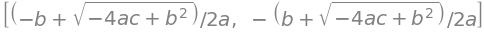

In [11]:
# Решение квадратного уравнения
sm.solve(a * x ** 2 + b * x + c, x)

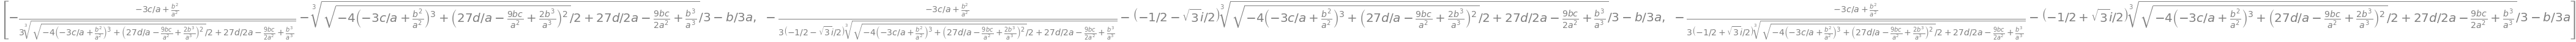

In [13]:
# Пример с уравнением третьей степени
res = sm.solve(a * x ** 3 + b * x ** 2 + c * x + d, x)
res

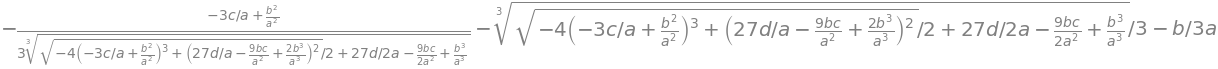

In [16]:
res[0] # первый корень

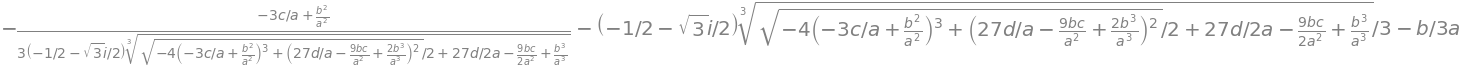

In [17]:
res[1] # второй корень и т.д.

### Функция roots() возвращает корни многочлена с кратностями:

In [19]:
sm.roots(x ** 3  - 3 * x + 2, x)                  # выводит {корень : кратность, корень : кратность, ...}

In [21]:
sm.cancel((x ** 3  - 3 * x + 2) / (x - 1) ** 2)

## Пределы
### Пусть задана числовая последовательность: $$x_n =  \frac{5n^2 + 2n}{7n^2 - 3n}$$ 

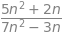

In [23]:
n = sm.symbols('n')
xn = (5 * n ** 2 + 2 * n) / (7 * n ** 2 - 3 * n)
xn

### Рассмотрим разность двух последовательных членов $x_{n + 1} - x_n$

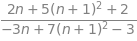

In [25]:
xn1 = xn.subs({n : n + 1})
xn1

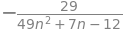

In [26]:
sm.simplify(xn1 - xn)

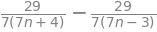

In [27]:
xnn = sm.apart(sm.simplify(xn1 - xn), n)
xnn

### Данная последовательность монотонно убывающая.
### Вычислим её предел с помощью функции limit():

In [32]:
lim_xn = sm.limit(xn, n, sm.oo)
print(f'Предел последовательность x_n = {lim_xn}.')

Предел последовательность x_n = 5/7.


## Производная
### Рассмотрим функцию $y = x^2$, приращение аргумента $dx$ и приращение функции $dy$

In [39]:
x, y, dx, dy = sm.symbols('x, y, dx, dy')
y = x ** 2
dy = y.subs({x: x + dx}) - y
print(f'y = {y}, Delta_y = {dy}')

y = x**2, dy = -x**2 + (dx + x)**2


### Найдём производную по определению: 
### $$y'(x) = \frac{dy}{dx} = \lim_{\Delta x\to 0} \frac{\Delta y}{\Delta x}$$


In [41]:
dydx = sm.limit(dy / dx, dx, 0)
dydx

In [43]:
sm.diff(y, x)

In [48]:
eq = x ** 3 + 2 * x ** 2 - 3
sm.solve(eq > 0, x)                  # можно находить промежутки моноттонности

# Ряды
## Разложение в ряд элементарных функций

In [49]:
x, y, n = sm.symbols('x, y, n')
cosx = sm.series(sm.cos(x), x, n = 8)
cosx

### Задание. Исследовать функцию $y = \frac{e^x}{x}$

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x, y = sm.symbols('x, y')
yx = sm.series(sm.exp(x), x, n = 8)
yx

In [81]:
y = sm.exp(x) / x
sm.solve(y > 0, x)

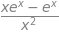

In [65]:
dy = y.subs({x: x + dx}) - y
dydx = sm.limit(dy / dx, dx, 0)
dydx

<function matplotlib.pyplot.show(close=None, block=None)>

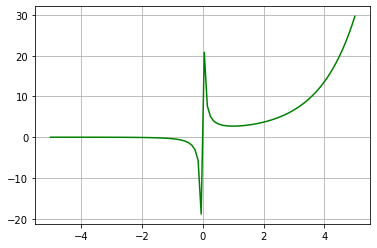

In [89]:
t = np.linspace(-5, 5, 100)
yy = sm.lambdify(x, y, 'numpy')
#d2y = sm.diff(y, x, 2)
#yy2y = sm.lambdify(x, d2y, 'numpy')
plt.plot(t, yy(t), 'g')
#plt.plot(t, yy2y(t), 'r-')
plt.grid()
plt.show

# Элементы аналитической геометрии и векторной алгебры

## Задача : Дана пирамида с координатами вершин:
## $$A_1(-2, -2, -6),\;A_2(2, -5, 0), A_3(-1, 4, -9), A_4(0, 3, 0)$$

## Найти:
## 1. Косинус угла $\alpha$ между плоскостями $A_1A_2A_3$ и $A_2A_3A_4$
## 2. Площадь грани $A_1A_2A_3$
## 3. Найти объём $V$ пирамиды
## 4. Длину высоты $H$, опущенной из вершины $A_4$ на грань $A_1A_2A_3$.
## 5. Координаты точки $A_5$ симметричной $A_4$ относительно грани $A_1A_2A_3$.
## 6. Координаты точки $A_6$ симметричной $A_4$ относительно прямой $A_2A_3$.

In [92]:
x, y, z = sm.symbols('x, y, z')
expression = 3 * x + 5 * y + 6 * z + 3
expression

In [94]:
expression.coeff(x)

In [95]:
expression.coeff(y)

## $x_ 2 - x_1 \  y_2 - y_1 \ z_2 - z_1 $
## $x_3 - x_1 \ y_3 - y_1 \ z_3 - z_1 $  = 0
## $x - x_1 \ \ \ y - y_1 \ \ \ z - z_1 $

In [ ]:
## Ручное вычисление определителей для плоскостей 
## [-2, -2, -6], [2, -5, 0], [-1, 4, -9], [0, 3, 0]
## 2 - (-2)      -5 - (-2)    0 - (-6)  =  4   -3     6
## -1 - (-2)     4 - (-2)    -9 - (-6)  =  1    6    -3   =  M1
## x - (-2)      y - (-2)     z -  (-6) =  x+2  y+2  z+6

## -1 - 2  4 + 5  -9 - 0      -3   9  -9
##  0 - 2  3 + 5   0 - 0  =   -2   8   0  = M2
##  x - 2  y + 5   z - 0     x-2  y+5  z

In [102]:
M1 = sm.Matrix([[4, -3, 6], [1, 6, -3], [x + 2, y + 2, z + 6]])
M2 = sm.Matrix([[-3, 9, -9], [-2, 8, 0], [x - 2, y + 5, z]])

In [108]:
exp1= sm.det(M1)
exp1

In [109]:
exp2 = sm.det(M2)
exp2

In [106]:
# Плоскости заданы как Ax + By + Cz + D = 0

In [127]:
A1, A2 = exp1.coeff(x), exp2.coeff(x)
B1, B2 = exp1.coeff(y), exp2.coeff(y)
C1, C2 = exp1.coeff(z), exp2.coeff(z)
#D1, D2 = exp1.subs({x: 0}).subs({y: 0}).subs({z: 0}), exp2.subs({x: 0}).subs({y: 0}).subs({z: 0})


In [131]:
cos_alpha = abs(A1 * A2 + B1 * B2 + C1 * C2) / ((A1**2 + B1**2 + C1**2)**(1/2) * (A2**2 + B2**2 + C2**2)**(1/2))
cos_alpha

In [140]:
# Вывод ответа в градусах :)

import math
res = math.degrees(math.acos(cos_alpha)) 
print(f'Угол между плоскостями A\u2081A\u2082A\u2083 и A\u2082A\u2083A\u2084 составляет примерно {round(res)}°.')

Угол между плоскостями A₁A₂A₃ и A₂A₃A₄ составляет примерно 55°.


## Задача 1. Найти Косинус угла $\alpha$ между плоскостями $A_1A_2A_3$ и $A_2A_3A_4$.



## _Математическая справка._

### Пусть в пространстве заданы три точки, не лежащие на одной прямой. Их координаты:
### $$M = (x_1, y_1, z_1);\\N = (x_2, y_2, z_2);\\K = (x_3, y_3, z_3).$$
### Если уравнение плоскости, имеющее вид
### $$Ax + By + Cz + D = 0,$$
### проходит через три точки, тогда его можно записать через определитель
### $$\begin{vmatrix}
 x_2 - x_1& y_2 - y_1& z_2 - z_1\\
 x_3 - x_1& y_3 - y_1& z_3 - z_1\\
 x - x_1& y - y_1& z - z_1
 \end{vmatrix} = 0.$$
#### _Откуда берётся уравнение?_
#### _Дополнительно рассматривается точка плоскости с произвольными координатами:_
#### $$T = (x, y, z)$$
#### _Выбирается любая точка из первой тройки (например, точка M) и из неё проводятся векторы в каждую из трёх оставшихся точек. Получетсятри вектора:_
#### $$MN = (x_2 − x_1, y_2 − y_1, z_2 − z_1);\\MK = (x_3 − x_1, y_3 − y_1, z_3 − z_1);\\MT = (x − x_1, y − y_1, z − z_1).$$

In [8]:
import numpy as np
import sympy as sm

# заданные точки
A1 = np.array([[-2, -2, -6],
               [2, -5, 0],
               [-1, 4, -9]])
A2 = np.array([[2, -5, 0],
               [-1, 4, -9],
               [0, 3, 0]])
x, y, z = sm.symbols('x, y, z')

# задание матриц соответствующих плоскостей
M1_before = np.array([[A1[1][0] - A1[0][0], A1[1][1] - A1[0][1], A1[1][2] - A1[0][2]],
                     [A1[2][0] - A1[0][0], A1[2][1] - A1[0][1], A1[2][2] - A1[0][2]],
                     [x - A1[0][0], y - A1[0][1], z - A1[0][2]]])
M2_before = np.array([[A2[1][0] - A2[0][0], A2[1][1] - A2[0][1], A2[1][2] - A2[0][2]],
                     [A2[2][0] - A2[0][0], A2[2][1] - A2[0][1], A2[2][2] - A2[0][2]],
                     [x - A2[0][0], y - A2[0][1], z - A2[0][2]]])

In [9]:
M1 = sm.Matrix(M1_before)
M2 = sm.Matrix(M2_before)

In [10]:
# вычисление определителя (плоскость A1A2A3)
expr1 = sm.det(M1)
expr1

-27*x + 18*y + 27*z + 144

In [11]:
# выичсление определителя (плоскость A2A3A4)
expr2 = sm.det(M2)
expr2

72*x + 18*y - 6*z - 54

In [12]:
# "вытаскивание" коэффициентов 
A1, A2 = expr1.coeff(x), expr2.coeff(x)
B1, B2 = expr1.coeff(y), expr2.coeff(y)
C1, C2 = expr1.coeff(z), expr2.coeff(z)

### Формула для вычисления косинуса угла:
## $$\cos(\alpha) = \frac{\left|A_1\cdot A_2 + B_1\cdot B_2 + C_1\cdot C_2\right|}{\sqrt{A_1^2 + B_1^2 + C_1^2}\cdot\sqrt{A_2^2 + B_2^2 + C_2^2}}$$

In [19]:
# вычисление косинуса угла
cos_alpha = abs(A1 * A2 + B1 * B2 + C1 * C2) / ((A1**2 + B1**2 + C1**2)**(1/2) * (A2**2 + B2**2 + C2**2)**(1/2))
cos_alpha

0.566946709513841

In [20]:
# Вывод ответа в градусах :)

import math
res = math.degrees(math.acos(cos_alpha)) 
print(f'Угол между плоскостями A\u2081A\u2082A\u2083 и A\u2082A\u2083A\u2084 составляет примерно {round(res)}°.')

Угол между плоскостями A₁A₂A₃ и A₂A₃A₄ составляет примерно 55°.


## Задача 2. Найти площадь грани $A_1A_2A_3$.

### Площадь треугольника вычисляется с помощью векторного произведения векторов по формуле:
### $$S_{(123)} = \frac{1}{2}\cdot\left|\left[\overline{A_1 A_2}\times\overline{A_1 A_3}\right]\right|.$$
### Векторное произведение:
### $$\overline{N} = \left[\overline{A_1 A_2}\times\overline{A_1 A_3}\right] = \begin{vmatrix}
 \overline{i}& \overline{j}& \overline{k}\\
 x_2 - x_1& y_2 - y_1& z_2 - z_1\\
 x_3 - x_1& y_3 - y_1& z_3 - z_1
 \end{vmatrix}  = $$
### $$ = \begin{vmatrix}
 y_2 - y_1& z_2 - z_1\\
 y_3 - y_1& z_3 - z_1 
 \end{vmatrix} \cdot \overline{i} - \begin{vmatrix}
 x_2 - x_1& z_2 - z_1\\
 x_3 - x_1& z_3 - z_1 
 \end{vmatrix} \cdot \overline{j} + \begin{vmatrix}
 x_2 - x_1& y_2 - y_1\\
 x_3 - x_1& y_3 - y_1 
 \end{vmatrix} \cdot \overline{k} = \dots$$

In [13]:
i, j, k = sm.symbols('i, j, k')

# вычисление векторного произведения
N_full = sm.Matrix([[i, j, k],
                   [A1[1][0] - A1[0][0], A1[1][1] - A1[0][1], A1[1][2] - A1[0][2]],
                   [A1[2][0] - A1[0][0], A1[2][1] - A1[0][1], A1[2][2] - A1[0][2]]])
N = sm.det(N_full)
N

-27*i + 18*j + 27*k

In [14]:
# вычисление длины N
a, b, c = N.coeff(i), N.coeff(j), N.coeff(k)
N_lgth = (a ** 2 + b ** 2 + c ** 2) ** (1 / 2)
N_lgth

42.2137418384109

In [15]:
# вычисление площади грани A1A2A3
S123 = N_lgth / 2
print(f'Площадь грани A\u2081A\u2082A\u2083 равна {round(S123, 2)} ед\u00B2.')

Площадь грани A₁A₂A₃ равна 21.11 ед².


## Задача 3. Найти объём $V$ пирамиды.
### В аналитической геометрии объем пирамиды традиционно рассчитывается с помощью смешанного произведения векторов:
### $$V = \frac{\left|p\right|}{6},$$
### $$ \text{где } p = \left(\overline{A_1 A_2}\cdot\overline{A_1 A_3}\cdot\overline{A_1 A_4}\right).$$
### Другая формула:
### $$V = \frac{1}{3}Sh,$$
### где $S$ – площадь грани, $h$ – длина высоты, опущенной к этой грани.

## Задача 4. Найти длину высоты $H$, опущенной из вершины $A_4$ на грань $A_1A_2A_3$.
### Длина высоты $A_4 H$ находится как расстояние от точки $A_4$ до плоскости $A_1 A_2 A_3$:
### $$\left|A_4 H\right| = \rho(A_4; A_1 A_2 A_3) = \frac{\left|A x_0 + By_0 + Cz_0 + D\right|}{\sqrt{A^2 + B^2 + C^2}}.$$

In [13]:
x0, y0, z0 = 0, 3, 0                               # задание координат точки A4
d = expr1.subs({x: 0}).subs({y: 0}).subs({z: 0})   # "вытаскивание" коэффицента D
d

144

In [17]:
# нахождение длины высоты H, опущенной из вершины A4 на грань A1A2A3
A4H = abs(a * x0 + b * y0 + c * z0 + d) / (a ** 2 + b ** 2 + c ** 2) ** (1 / 2)
A4H

4.69041575982343

In [18]:
# вычисление объёма пирамиды
V = (1 / 3) * S123 * A4H
print(f'Объём пирамиды V равен {round(V)} ед\u00B3.')

Объём пирамиды V равен 33 ед³.


## Задача 5. Найти координаты точки $A_5$, симметричной $A_4$ относительно грани $A_1A_2A_3$.

### Прямая, проходящая через точку $A_5(x_5; y_5; z_5)$ и перпендикулярная плоскости $Ax + By + Cz + D = 0$ имеет направляющий вектор $(A; B; C)$ и, значит, представляется симметричными уравнениями:
### $$\frac{x - x_0}{A} = \frac{y - y_0}{B} = \frac{z - z_0}{C}.$$

In [16]:
a = expr1.coeff(x)
b = expr1.coeff(y)
c = expr1.coeff(z)
x0, y0, z0 = 0, 3, 0

# нахождение параметра t после задания параметрического уравнения 
t = sm.symbols('t')
t1 = a * t + x0           # x из симметричного уравнения
t2 = b * t + y0           # y из симметричного уравнения
t3 = c * t + z0           # z из симметричного уравнения

t_eq = expr1.subs({x: t1}).subs({y: t2}).subs({z: t3})
t_param = sm.solve(t_eq, t)
t_param[0]

-1/9

In [20]:
# нахождение координаты точки N
xn = t1.subs({t: t_param[0]})
yn = t2.subs({t: t_param[0]})
zn = t3.subs({t: t_param[0]})
xn, yn, zn

(3, 1, -3)

In [21]:
# Точка N(xn, yn, zn) является серединой отрезка A4A5 
x5 = 2 * xn - x0
y5 = 2 * yn - y0
z5 = 2 * zn - z0
print(f'Точка A\u2085({x5},{y5},{z5}) симметрична точке A\u2084 относительно грани A\u2081A\u2082A\u2083.')

Точка A₅(6,-1,-6) симметрична точке A₄ относительно грани A₁A₂A₃.


## Задача 6. Найти координаты точки $A_6$, симметричной $A_4$ относительно прямой $A_2A_3$.

In [91]:
A2 = (2, -5, 0)                                                         # координаты точки A2
A3 = (-1, 4, -9) 
# координаты точки A3
x0, y0, z0 = 0, 3, 0
n = (A3[0] - A2[0], A3[1] - A2[1], A3[2] - A2[2])                       # вектор нормали
plane = n[0] * (x - x0) + n[1] * (y - y0) + n[2] * (z - z0)             # уравнение искомой плоскости
plane

-3*x + 9*y - 9*z - 27

In [93]:
x1 = n[0] * t + A2[0]                                                   # параметрические уравнения
y1 = n[1] * t + A2[1]
z1 = n[2] * t + A2[2]

t_eq = plane.subs({x: x1}).subs({y: y1}).subs({z: z1})                  # подстановка в уравнение плоскости
t_param = sm.solve(t_eq, t)                                             # нахождение значения параметра
t_param[0]

26/57

In [94]:
# нахождение координат точек пересечения 
xn = x1.subs({t: t_param[0]})
yn = y1.subs({t: t_param[0]})
zn = z1.subs({t: t_param[0]})
xn, yn, zn

(12/19, -17/19, -78/19)

In [95]:
# т.к. N(xn, yn, zn) - середина отрезка A4A6, то
x6 = 2 * xn - x0
y6 = 2 * yn - y0
z6 = 2 * zn - z0
print(f'Точка A\u2086({x6}, {y6}, {z6}) симметрична точке A\u2084 относительно прямой A\u2082A\u2083.')

Точка A₆(24/19, -91/19, -156/19) симметрична точке A₄ относительно прямой A₂A₃.


## Найти координаты точки $M_2(x_2, y_2, z_2)$, симметричной точке $M_1(x_1, y_1, z_1)$ относительно прямой 
## $$ \frac{x - x_0}{m} = \frac{y - y_0}{n} = \frac{z - z_0}{p}.$$
## 1. Находим уравнение  плоскости, которая перпендикулярна данной прямой и проходит через точку $M_1(x_1, y_1, z_1)$. Так плоскость перпендикулярна заданной прямой, то в качестве ее вектора нормали можно взять направляющий вектор прямой, т.е. 
## $$\overline{n} = \overline{s} = \{m; n; p\}.$$
## Поэтому уравнение плоскости будет
## $$m(x - x_1) + n(y - y_1) + p(z - z_1) = 0.$$

## 2. Находим точку $M_3(x_3, y_3, z_3)$ пересечения прямой $\frac{x - x_0}{m} = \frac{y - y_0}{n} = \frac{z - z_0}{p}$ и плоскости $m(x - x_1) + n(y - y_1) + p(z - z_1) = 0$.

##  3. Точка $M_3$ является серединой отрезка $M_1 M_2$, где точка $M_2$ является точкой симметричной точке $M_1$, поэтому
## $$x_2 = 2x_1 - x_3, y_2 = 2y_1 - y_3, z_2 = 2z_1 - z_3.$$

In [84]:
import numpy as np
import sympy as sm
from sympy import symbols, solve

x, y, z, t = symbols('x, y, z, t')

M1 = (0, 3, 0)
A2 = (2, -5, 0)
A3 = (-1, 4, -9)
n = (A3[0] - A2[0], A3[1] - A2[1], A3[2] - A2[2])
plane = n[0] * (x - M1[0]) + n[1] * (y - M1[1]) + n[2] * (z - M1[2])
plane

-3*x + 9*y - 9*z - 27

In [88]:
# Нахождение координаты точки M3(x3, y3, z3) пересчения прямой и плоскости
xx = A2[0] + n[0] * t
yy = A2[1] + n[1] * t
zz = A2[2] + n[2] * t

t_eq = plane.subs({x: xx}).subs({y: yy}).subs({z: zz})
t0 = solve(t_eq, t)

x3 = A2[0] + n[0] * t0[0]
y3 = A2[1] + n[1] * t0[0]
z3 = A2[2] + n[2] * t0[0]
x3, y3, z3

(12/19, -17/19, -78/19)

In [89]:
x2 = 2 * M1[0] - x3
y2 = 2 * M1[1] - y3
z2 = 2 * M1[2] - z3
x2, y2, z2

(-12/19, 131/19, 78/19)

## Задача 6.

In [79]:
import numpy as np
from sympy import symbols, solve

x, y, z, t = symbols('x, y, z, t')

M = (0, 3, 0)
M_eq = (2, -5, 0)
M_eq2 = (-1, 4, -9)
n = (M_eq2[0] - M_eq[0], M_eq2[1] - M_eq[1], M_eq2[2] - M_eq[2])
#M = (0, 2, 1)
#M_eq = (1.5, 0, 2)
#n = (2, -1, 1)
plane = n[0] * (x - M[0]) + n[1] * (y - M[1]) + n[2] * (z - M[2])
plane

-3*x + 9*y - 9*z - 27

In [80]:
# Найдём точку M0, точку пересечения прямой и плоскости
# Запишем параметрические уравнения прямой
xx = n[0] * t + M_eq[0]
yy = n[1] * t + M_eq[1]
zz = n[2] * t + M_eq[2]
xx, yy, zz

(2 - 3*t, 9*t - 5, -9*t)

In [81]:
# Найденные xx, yy, zz подставляются в уравнение плоскости
t_eq = plane.subs({x: xx}).subs({y: yy}).subs({z: zz})
t_param = solve(t_eq, t)
t_param[0]

26/57

In [82]:
# Координаты точки пересечения прямой и плоскости
x0 = xx.subs({t: t_param[0]})
y0 = yy.subs({t: t_param[0]})
z0 = zz.subs({t: t_param[0]})
x0, y0, z0

(12/19, -17/19, -78/19)

In [1]:
# Так как M0 является серединой отрезка MM', то
x2 = 2 * x0 - M[0]
y2 = 2 * y0 - M[1]
z2 = 2 * z0 - M[2]

print(f'Точка A\u2086({x2}, {y2}, {z2}) симметрична точке A\u2084 относительно прямой A\u2082A\u2083.')

NameError: name 'x0' is not defined

## Задача 7. Найти координаты центра описанной сферы и радиус.

In [6]:
import numpy as np
import sympy as sm

A1 = np.array([[-2, -2, -6],
                 [2, -5, 0],
                 [-1, 4, -9]])
x, y, z = sm.symbols('x, y, z')

# задание матриц соответствующих плоскостей
M_before = np.array([[A1[1][0] - A1[0][0], A1[1][1] - A1[0][1], A1[1][2] - A1[0][2]],
                     [A1[2][0] - A1[0][0], A1[2][1] - A1[0][1], A1[2][2] - A1[0][2]],
                     [x - A1[0][0], y - A1[0][1], z - A1[0][2]]])
expr = sm.det(sm.Matrix(M_before))
expr

-27*x + 18*y + 27*z + 144

In [7]:
A, B, C = expr.coeff(x), expr.coeff(y), expr.coeff(z)

x0 = (abs())

(-27, 18, 27)